# Objects with variable refraction index

In [2]:
from diffractio import degrees, np, plt, um
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X

In [3]:
x0 = np.linspace(-100 * um, 100 * um, 1024 * 4)
z0 = np.linspace(0 * um, 200 * um, 1024 * 4)
wavelength = .6328 * um

In [4]:
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(
    A=1, x0=35 * um, z0=-250 * um, w0=10 * um, theta=0. * degrees)
u1 = Scalar_source_X(x=x0, wavelength=wavelength)
u1.gauss_beam(A=1, x0=0 * um, z0=-250 * um, w0=10 * um, theta=0. * degrees)

u2 = Scalar_source_X(x=x0, wavelength=wavelength)
u2.gauss_beam(
    A=1, x0=-35 * um, z0=-250 * um, w0=10 * um, theta=0. * degrees)

uf = u0 + u1 + u2

In [5]:
t0 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1.0)
t0.incident_field(uf)

In [6]:
pn = dict(n_out=1.5, n_center=4, cx=0, cz=100, radius=75)

# ref_index = "{p[n_out]}".format(p=pn)
center = (pn['cx'], pn['cz'])
radius = pn['radius']
# ref_index = '2*(((X-0)**2+(Z-300)**2)/75**2-0)'
ref_index = "{p[n_out]}+({p[n_center]}-{p[n_out]})*(1-((X-{p[cx]})**2+(Z-{p[cz]})**2)/{p[radius]}**2)".format(
    p=pn)
print("n={}".format(ref_index))

n=1.5+(4-1.5)*(1-((X-0)**2+(Z-100)**2)/75**2)


In [7]:
t0.sphere(
    r0=center,
    radius=(radius, radius),
    refraction_index=ref_index,angle=0);

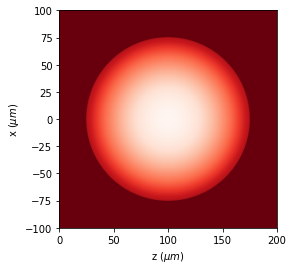

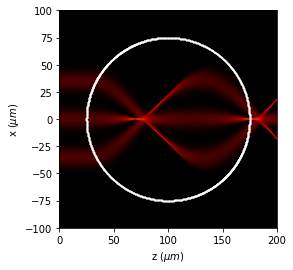

In [8]:
t0.draw_refraction_index(draw_borders=False, scale='scaled')
t0.BPM(verbose=False)
t0.draw(
    kind='intensity',
    logarithm=True,
    draw_borders=True,
    min_incr=0.05,
    scale='scaled')